# Human body temperature

#### Practical example for open loop and feedback control of thermoregulation in human bodies. 

#### The process is modelled with a function in the form of:
``` y(k) = (T*a*u(k) + y(k-1)) / (1+T*b) ```, where {a,b} are model parameters and T is the process sampling time

In [108]:
import matplotlib.pyplot as plt
from time import sleep

## System modelling

In [109]:
T = 0.1           
a,b = 0.5,0.9     
r = [0]           # Reference vector
y = [0]           # Output vector (initial condition)
t = [0]           # Time vector

In [110]:
def bodyTemp(u):
    return (T*a*u + y[-1])/(1+T*b)

## Open Loop

In [111]:
while True:
    r.append(36.5)            # Body temperature must be maintained at around 36.5 degrees Celsius
    y.append(bodyTemp(r[-1]))
    sleep(T)
    t.append(len(y)*T)
    if t[-1] > 5:             # Run for a 5 seconds
        break

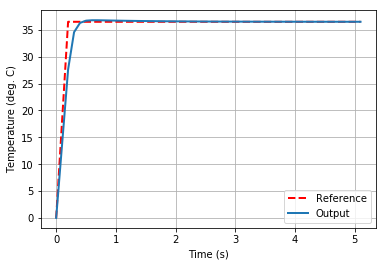

In [117]:
def plot():
    plt.figure()
    plt.grid()
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature (deg. C)')
    plt.plot(t,r,'--r',linewidth=2.0)
    plt.plot(t,y,linewidth=2.0)
    plt.legend(['Reference', 'Output'])
    plt.show()

plot()

## Feedback Control

In [118]:
r = [0]          # Reference vector
u = [0]          # Control output vector  
y = [0]          # Process output vector
e = [0]          # Error vector
t = [0]          # Time vector

In [119]:
def control(r):
    c, d = 15, 15    # Controller gains
    e.append(r-y[-1])
    return (e[-1]*(c+T*d) - c*e[-2] + u[-1])

In [120]:
while True:
    r.append(36.5)            # Body temperature must be maintained at around 36.5 degrees Celsius
    u.append(control(r[-1]))
    y.append(bodyTemp(u[-1]))
    sleep(T)
    t.append(len(y)*T)
    if t[-1] > 5:             # Run for a 5 seconds
        break

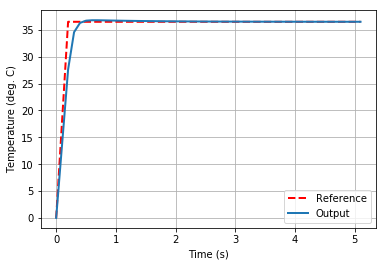

In [121]:
plot()